# Assignmnet 1 (100 points)

**Name:** Jiahui Dai<br>
**Email:** jid4620@thi.de <br>
**Group:** A/B <br>
**Hours spend *(optional)* :** <br>

General Rules:

- No helping libraries allowed.
- The use of standard libraries provided by the programming language itself (e.g., built-in data structures like lists and dictionaries, basic input/output functions, core mathematical functions) is generally permitted. These are considered fundamental to the language and not "helping libraries" in the context of this regulation
- If you need to use special Python modules, you can discuss with your instructor before submission.
- You can use the provided libraries but not mndatary.
- Always try To bulid your code from scratch.


### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve.</p>



In [2]:
### You migh use these libraries if needed.

import matplotlib.pyplot as plt
import string
import re

###### TO DO ##########
filename = "jungle_book.txt"
word_freq = dict()

with open(filename, "r", encoding="utf-8") as file:
    content = file.read()   # read content of file
    words = re.split(r"[^\w']+", content) # split content with non-alphabet into words, exclude '
    words = [word.lower() for word in words if word.isalpha()] # make all words lower letter

# To count word frequency
for word in words:
    word = word.lower()

    # initialise word in dict
    if word not in word_freq:
        word_freq[word] = 0

    # increase frequency
    word_freq[word] += 1

The following is a list of unique words sorted descendingly to their frequency

In [14]:
import pandas as pd

# Sort the dictionary by values in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

df = pd.DataFrame(list(sorted_word_freq.items()), columns=['Word', 'Frequency'])
df.to_csv('output/word_freq.csv', index=False)
df

,Word,Frequency
0,the,3728
1,and,2355
2,of,1348
3,to,1287
4,a,1173
...,...,...
4939,facility,1
4940,includes,1
4941,produce,1
4942,subscribe,1


**Statistical analysis**

In [4]:
rank = [i+1 for i in range(len(sorted_word_freq))]
frequencies = list(sorted_word_freq.values())

# Calculation of expected frequencies
max_freq = max(sorted_word_freq.values())
expected = [1/(i+1) * max_freq for i in range(len(sorted_word_freq))]

In [ ]:
#############################
# Adapted from 
# https://medium.com/@patwariraghottam/mastering-chi-square-goodness-of-fit-tests-with-python-implementation-and-visualization-58d619b5e02c
#############################

from GoodnessOfFit import ChiSquareGoodnessOfFit

observed = frequencies  # Observed frequencies
expected = expected  # Expected frequencies (assuming uniform distribution)
  
# Create instance of ChiSquareGoodnessOfFit
chi_square_test = ChiSquareGoodnessOfFit(observed, expected)

#Calculating chi-square statistic
print("Chi-square_Statistic : {}".format(chi_square_test.calculate_chi_square()))
print("*"*70)

# Perform Chi-Square goodness of fit test with alpha = 0.05
chi_square_test.testing(0.05)

Chi-square_Statistic : 19760.11496822835
**********************************************************************
Chi-square_Critical : 5107.674219300448
**********************************************************************
Reject the null hypothesis i.e, we can say that observed and expected frequencies are different


**Graph plotting of Linear Curve and Log-Log Curve**

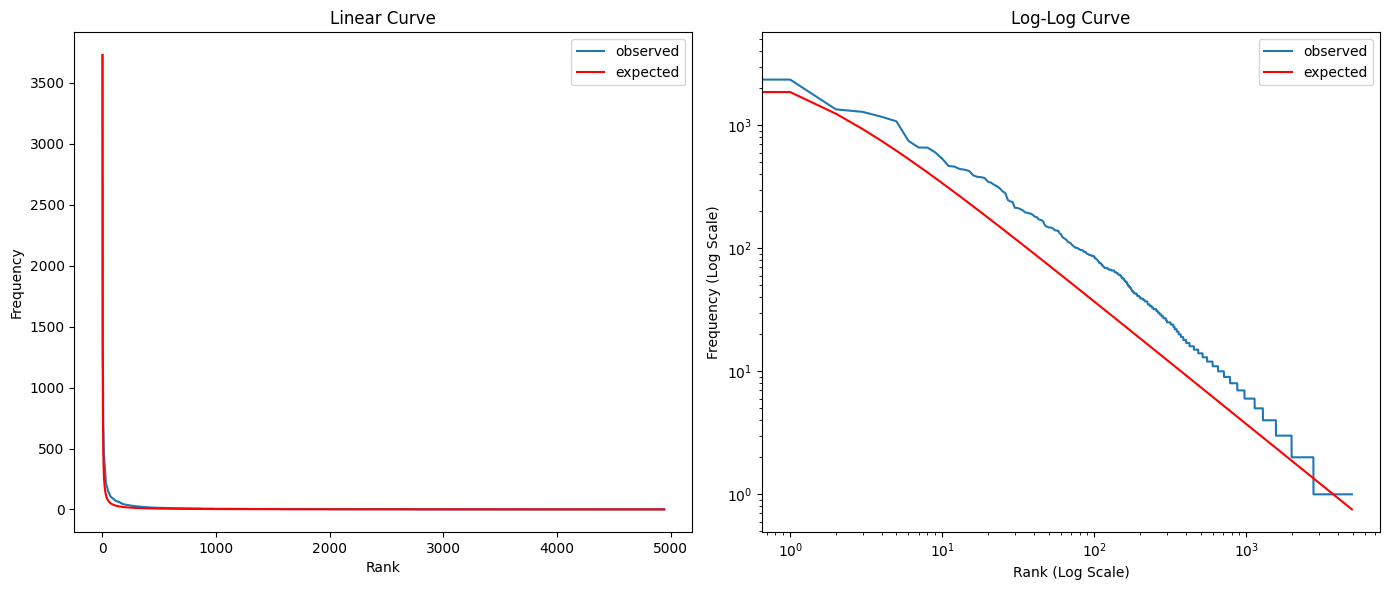

In [6]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# First subplot: Linear curve
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.plot(rank, frequencies, label='observed')
plt.plot(rank, expected, color='red', label='expected')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Linear Curve')
plt.legend()

# Second subplot: Log-Log curve
plt.subplot(1, 2, 2)
plt.loglog(frequencies, label='observed')
plt.loglog(expected, color='red', label='expected')
plt.xlabel('Rank (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Log-Log Curve')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.savefig('output/q1_plot.png')
plt.show()

### Question 2: Mutual Information *(30 points)*

Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. 

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. </p>



In [7]:
### You migh use these libraries if needed.

import string
import math
from collections import Counter

###### TO DO #########
filename = "jungle_book.txt"
word_pair = list()
pmi_word_pair = dict()

with open(filename, "r", encoding="utf-8") as file:
    content = file.read()   # read content of file
    words = re.split(r"\W+", content) # split content with non-alphabet into words
    words = [word.lower() for word in words if word.isalpha()] # make all words lower letter

# To create successive word pair
for i in range(len(words)-1):
    w1 = words[i]
    w2 = words[i+1]

    word_pair.append(f"{w1} {w2}")

# To create Counters for individual words and successive word pair
c = Counter(words)
c_pair = Counter(word_pair)

for i in range(len(words)-1):
    w1 = words[i]
    w2 = words[i+1]
    w_pair = f"{w1} {w2}"

    # ignore if w1 or w2 occurance that is < 10
    if c[w1] < 10:
        continue

    if c[w2] < 10:
        continue

    # calculate pmi
    pmi = math.log((c_pair[w_pair] * len(words)) / (c[w1] * c[w2]))

    # append to pmi word pair
    pmi_word_pair[(w1, w2)] = pmi


In [8]:
import pandas as pd


# Sort pmi_word_pair based on values (pmi) in descending order
sorted_pmi_word_pair = dict(sorted(pmi_word_pair.items(), key=lambda item: item[1], reverse=True))

# Convert sorted_pmi_word_pair dict to df
df = pd.DataFrame(list(sorted_pmi_word_pair.items()), columns=["word_pair", "pmi"])
df[['w1', 'w2']] = df['word_pair'].apply(lambda x: pd.Series(x)) # Split the word pair into w1 and w2
df = df.drop(columns=["word_pair"])                             # Drop the original "Word Pair" column
df = df[['w1', 'w2', 'pmi']]                                    # Reorder columns


List 30 word pair with highest pmi

In [ ]:
top_30_rows = df.head(30)
top_30_rows.to_csv('output/top_30_rows.csv', index=False)

top_30_rows

,w1,w2,pmi
0,machua,appa,8.543339
1,united,states,8.302177
2,literary,archive,8.233184
3,cold,lairs,7.694188
4,archive,foundation,7.579258
5,bandar,log,7.414874
6,petersen,sahib,7.385887
7,stretched,myself,7.339366
8,paragraph,f,7.339366
9,hind,legs,7.234656


List 30 word pair with lowest pmi

In [ ]:
bottom_30_rows = df.tail(30).iloc[::-1] # in reverse order of pmi
bottom_30_rows.to_csv('output/bottom_30_rows.csv', index=False)

bottom_30_rows

,w1,w2,pmi
14927,the,the,-5.507092
14926,and,and,-4.587357
14925,he,the,-4.280525
14924,the,he,-4.280525
14923,the,to,-3.751404
14922,of,of,-3.471520
14921,i,and,-3.300034
14920,they,the,-3.236172
14919,to,he,-3.217983
14918,was,and,-3.107196


**Statistical Analysis**

In [ ]:
total = len(words)
observed = list() # conditional probability
expected = list() # unigram probability / independent probability

# Find probability of word
def word_probability(word):
    return c[word] / total

# To calculate the conditional probability of word based on its words occuring before itself
cond_prob = 1
for i, word in enumerate(words):
    word_prob = word_probability(word)
    cond_prob *= word_prob

    expected.append(word_prob)
    observed.append(cond_prob)

In [ ]:
#############################
# Adapted from 
# https://medium.com/@patwariraghottam/mastering-chi-square-goodness-of-fit-tests-with-python-implementation-and-visualization-58d619b5e02c
#############################

from GoodnessOfFit import ChiSquareGoodnessOfFit

observed = observed  # Observed frequencies
expected = expected  # Expected frequencies (assuming uniform distribution)
  
# Create instance of ChiSquareGoodnessOfFit
chi_square_test = ChiSquareGoodnessOfFit(observed, expected)

#Calculating chi-square statistic
print("Chi-square_Statistic : {}".format(chi_square_test.calculate_chi_square()))
print("*"*70)

# Perform Chi-Square goodness of fit test with alpha = 0.05
chi_square_test.testing(0.05)

Chi-square_Statistic : 572.4405452818747
**********************************************************************
Chi-square_Critical : 57009.8446715156
**********************************************************************
fail to reject the null hypothesis i.e, observed and expected frequencies are same


### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements.</p>



<h4> Datasets and Resources </h4>

* WikiText-2 (raw/unprocessed), Train, Dev, Test

**Data Processing Steps**
1. Text toteknisation
    - The text data is broken into individual words (token), with punctuation, special characters and whitespace removed.
2. Unique vocabulary list
    - A list of unique words is created as it will be used for generating bigrams.


**Method**
- Building 2-gram (bigram) model: Iterate through the corpus and extract consecutive pairs of words (bigram) and count the frequency of each bigram.
- Estimating bigram probabilities:
    $$P(w_n | w_{n-1}) = \frac{C(w_{n-1}, w_n)}{C{w_{n-1}}}$$
    where
    - $w_n$: current word
    - $w_{n-1}$: previous word
    - $C(w_{n-1}, w_n)$: frequency of bigram
    - $C(w_{n-1})$: frequency of previous word
- Implementation of additive smoothing to handle unseen bigrams (e.g. not seen in training data)
    $$P(w_n | w_{n-1}) = \frac{C(w_{n-1}, w_n) + \alpha}{C{w_{n-1}} + V}$$
    where
    - $V$: size of vocabulary list


**Experiment Design**
1. Use a large text corpus for training the model, i.e. WikiText-2 (train dataset)
2. Evaluate and fine-tune the model with validation dataset, i.e. WikiText-2 (valid dataset)
3. Evaluate the performance of the model with testing dataset, i.e. WikiText-2 (test dataset)



**Hyper-parameters**
- Vocabulary size $V$: number of unique words in the corpus
- Smoothing parameter $\alpha$: typically set to 1 for Laplace Smoothing
- Corpus size $N$: total number of tokens in the corpus


**Evaluation metric**
1. Perplexity: To measure how well the model predicts a sample
    $$\text{Perplexity}(W) = 2^{H(W)}$$
    where $H(W)$ is the cross-entropy of the model


In [13]:
######## You might use these libraries if needed.

import math
from collections import defaultdict, Counter
import string
import re
import os
import random
from math import log  # Import log function

####### TO DO #######

# Load dataset
def load_dataset(filename):
    with open(filename, "r", encoding="utf-8") as file:
        content = file.read()
    return content

# Data Preprocessing: Tokenization and cleaning
def preprocess(text):
    words = re.split(r"\W+", text) # split content with non-alphabet into words
    words = [word.lower() for word in words if word.isalpha()] # make all words lower letter
    return words

# Build the bigram model
def build_bigram_model(corpus):
    bigram_model = defaultdict(lambda: defaultdict(int))
    for i in range(len(corpus) - 1):
        bigram_model[corpus[i]][corpus[i + 1]] += 1
    return bigram_model

# Calculate bigram probabilities with smoothing
def calculate_bigram_probabilities(bigram_model, vocab_size, alpha=1):
    bigram_probabilities = defaultdict(lambda: defaultdict(float))
    for w1 in bigram_model:
        total_count = sum(bigram_model[w1].values()) + alpha * vocab_size  # Additive smoothing
        for w2 in bigram_model[w1]:
            bigram_probabilities[w1][w2] = (bigram_model[w1][w2] + alpha) / total_count
    return bigram_probabilities

# Evaluate the model using perplexity
def evaluate_model(bigram_probabilities, corpus):
    log_prob_sum = 0
    for i in range(len(corpus) - 1):
        w1, w2 = corpus[i], corpus[i + 1]
        prob = bigram_probabilities[w1].get(w2, 1 / len(bigram_probabilities))  # Handle unseen words
        log_prob_sum += -math.log2(prob)
    
    return 2 ** (log_prob_sum / len(corpus))

# Hyperparameter tuning using validation set
def tune_hyperparameter(train_data, val_data, vocab_size, alpha_values):
    best_alpha = None
    lowest_perplexity = float("inf")

    for alpha in alpha_values:
        bigram_model = build_bigram_model(train_data)
        bigram_probabilities = calculate_bigram_probabilities(bigram_model, vocab_size, alpha)
        perplexity = evaluate_model(bigram_probabilities, val_data)
        print(f"Alpha: {alpha:3}, Validation Perplexity: {perplexity}")

        if perplexity < lowest_perplexity:
            lowest_perplexity = perplexity
            best_alpha = alpha
    
    return best_alpha


# Load dataset
train_filename = "wiki.train.raw"
val_filename = "wiki.train.raw"
test_filename = "wiki.train.raw"

train_content = load_dataset(train_filename)
val_content = load_dataset(val_filename)
test_content = load_dataset(test_filename)

# Preprocess the dataset
train_data = preprocess(train_content)
val_data = preprocess(val_content)
test_data = preprocess(test_content)

# Get vocabulary size
vocab_size = len(set(words))

# Hyperparameter tuning
alpha_values = [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100]
best_alpha = tune_hyperparameter(train_data, val_data, vocab_size, alpha_values)
print(f"Best Alpha: {best_alpha}")

# Train final model with best alpha
bigram_model = build_bigram_model(train_data)
bigram_probabilities = calculate_bigram_probabilities(bigram_model, vocab_size, best_alpha)

# Evaluate on test set
test_perplexity = evaluate_model(bigram_probabilities, test_data)
print(f"Final Test Perplexity: {test_perplexity}")

Alpha: 0.1, Validation Perplexity: 294.43278604090057
Alpha: 0.5, Validation Perplexity: 600.4925381038504
Alpha:   1, Validation Perplexity: 818.2167050666721
Alpha:   2, Validation Perplexity: 1090.481675914145
Alpha:   5, Validation Perplexity: 1522.8669411046963
Alpha:  10, Validation Perplexity: 1895.0404233079391
Alpha:  25, Validation Perplexity: 2431.7506374516656
Alpha:  50, Validation Perplexity: 2854.542268764257
Alpha: 100, Validation Perplexity: 3269.207580934627
Best Alpha: 0.1
Final Test Perplexity: 294.43278604090057


**Findings**
- Small $\alpha$ (e.g. < 1) keeps probabilities close to original counts. The model assigns zero probability to unseen words -> high perplexity
- Large $\alpha$ (e.g. > 1) increases all probabilities, making unseen words more likely. The model gives unrealistic probability to unseen words -> low perplexity
- A perplexity of 1 is ideal, and higher values suggest the model struggles with unseen or rare word combinations. 
- What is seen here is that as $\alpha$ increases, the validation perplexity decreases. This means that the model is more confident in its predictions with higher $\alpha$ value. 


**Drawbacks**
- High smoothing can reduce model specificity.
    - Wih $\alpha = 100$, probabilities are spread more evenly, reducing the model ability to distinguish frequent and rare bigrams 
- Limited context with 2-Gram model
    - The bigram model only considers one previous word, missing longer dependencies in sentences
- Low perplexity does not gurantee better text generation or predictive power in real world applications


**Improvements**
- Use higher order N-Grams, e.g. 3-Gram or 4-Gram
- Experiment with different smoothing techniques 
- Apply backoff or interpolation
- Increase training data
- Evaluate other metrics apart from perplexity


### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*


- Calculate Bigram Probabilities with Back-off.
- Demonstrate and discuss your Back-off implementation.
